Davies-Bouldin Index: 1.2090609413401774
Cluster
 0    59
 3    49
 1    44
 2    44
-1     3
Name: count, dtype: int64


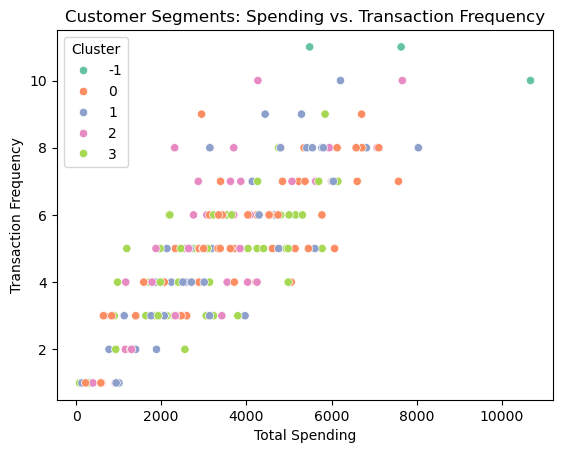

In [9]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("C:/Users/Akshay G S/OneDrive/Desktop/Uvce Documents/Zeotap/Customers.csv")
transactions = pd.read_csv("C:/Users/Akshay G S/OneDrive/Desktop/Uvce Documents/Zeotap/Transactions.csv")

# Merge datasets
merged = transactions.merge(customers, on="CustomerID", how="left")


features = merged.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spending
    'Quantity': 'sum',    # Total quantity purchased
    'TransactionDate': 'count'  # Frequency of transactions
}).rename(columns={'TransactionDate': 'TransactionCount'})

# Merge
features = features.merge(customers.set_index('CustomerID'), on='CustomerID')
features = pd.get_dummies(features, columns=['Region'], drop_first=True)

# Drop non-numerical data and scale features
X = features.drop(['CustomerName', 'SignupDate'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)  
clusters = dbscan.fit_predict(X_scaled)


features['Cluster'] = clusters


db_index = davies_bouldin_score(X_scaled, clusters)
print(f"Davies-Bouldin Index: {db_index}")

print(features['Cluster'].value_counts())

sns.scatterplot(data=features, x='TotalValue', y='TransactionCount', hue='Cluster', palette='Set2')
plt.title('Customer Segments: Spending vs. Transaction Frequency')
plt.xlabel('Total Spending')
plt.ylabel('Transaction Frequency')
plt.legend(title='Cluster')
plt.show()
